<a href="https://colab.research.google.com/github/FranciscoAguiar/DataScienceProgramming/blob/master/ProcessingTwitters_UEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
!tar -xvf dados-curso-completo.csv.tar.gz

--2020-10-08 03:07:45--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‘dados-curso-completo.csv.tar.gz.2’

dados-curso-complet 100%[===================>] 136.70M  67.3MB/s    in 2.0s    

2020-10-08 03:07:47 (67.3 MB/s) - ‘dados-curso-completo.csv.tar.gz.2’ saved [143340808/143340808]

dados-curso-completo.csv


In [136]:
!pip install geopandas
!pip install wordcloud

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import nltk

from shapely.geometry import Point
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_colwidth', None)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
tweets_df = pd.read_csv('dados-curso-completo.csv')
tweets_df.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congresso está sentado em 3BI olhando a pandemia da janela.,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspendeu as aulas da rede estadual até 31 de março. ⁣\n⁣\nEsta ação está ali… https://t.co/EPFXOMtwSY",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanciamento social fazem parecer que as pessoas com alguma doença pré-exis… https://t.co/oEyXDF9cDy,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? https://t.co/JT1oMiUCXf,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu material por e-mail ou WhatsApp. Caso venha até a empresa traga seu ma… https://t.co/p6wcoomynZ,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


In [139]:
total_records = len(tweets_df.index)
print('Total records:', total_records)

print('Number of records without date:', tweets_df.data.isnull().sum())
print('Number of records without text:', tweets_df.texto.isnull().sum())

no_city_count = tweets_df.lugar.isnull().sum()
no_city_percentage = tweets_df.lugar.isnull().mean() * 100
print('Number of records without city:', no_city_count)
print('Percentage of records without city:', no_city_percentage)

print(tweets_df['pais'].isnull().sum())
print(tweets_df['pais'].isna().sum())
print('lat', tweets_df['latitude'].isna().sum())
print('lat', tweets_df['latitude'].isnull().sum())
print(tweets_df['longitude'].isna().sum())
tweets_df.info()
tweets_df.count()

Total records: 1658825
Number of records without date: 0
Number of records without text: 0
Number of records without city: 1584220
Percentage of records without city: 95.50253944810333
1584225
1584225
lat 1650105
lat 1650105
1650105
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: f

data          1658825
usuario       1658768
apelido       1658825
texto         1658825
retweet       1658825
seguidores    1658825
idioma        1658825
lugar           74605
pais            74600
sigla           74595
latitude         8720
longitude        8720
hashtags      1658825
dtype: int64

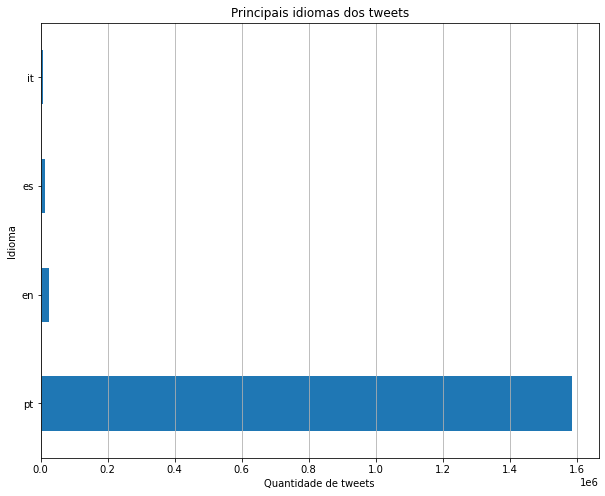

In [140]:
tweets_df.groupby('idioma').idioma.count().sort_values(ascending = False)[:4].plot(kind='barh', figsize=(10, 8))
plt.title('Principais idiomas dos tweets')
plt.xlabel('Quantidade de tweets')
plt.ylabel('Idioma')
plt.grid(axis='x')
plt.show()

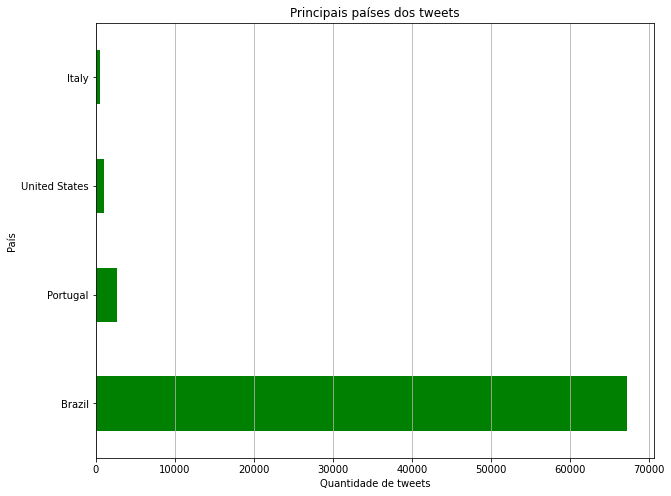

In [141]:
tweets_df.groupby('pais').pais.count().sort_values(ascending = False)[:4].plot(kind='barh', figsize=(10, 8), color='g')
plt.title('Principais países dos tweets')
plt.xlabel('Quantidade de tweets')
plt.ylabel('País')
plt.grid(axis='x')
plt.show()

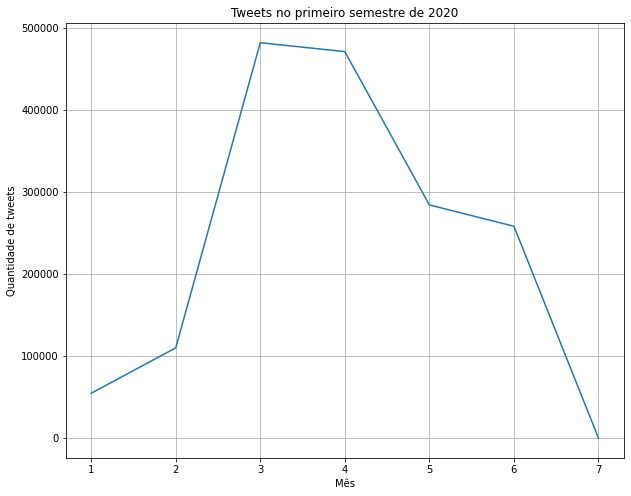

In [142]:
tweets_df.data = tweets_df.data.astype("datetime64")
tweets_df.groupby(tweets_df.data.dt.month).texto.count().plot(figsize=(10, 8))
plt.title('Tweets no primeiro semestre de 2020')
plt.xlabel('Mês')
plt.ylabel('Quantidade de tweets')
plt.grid()
plt.show()

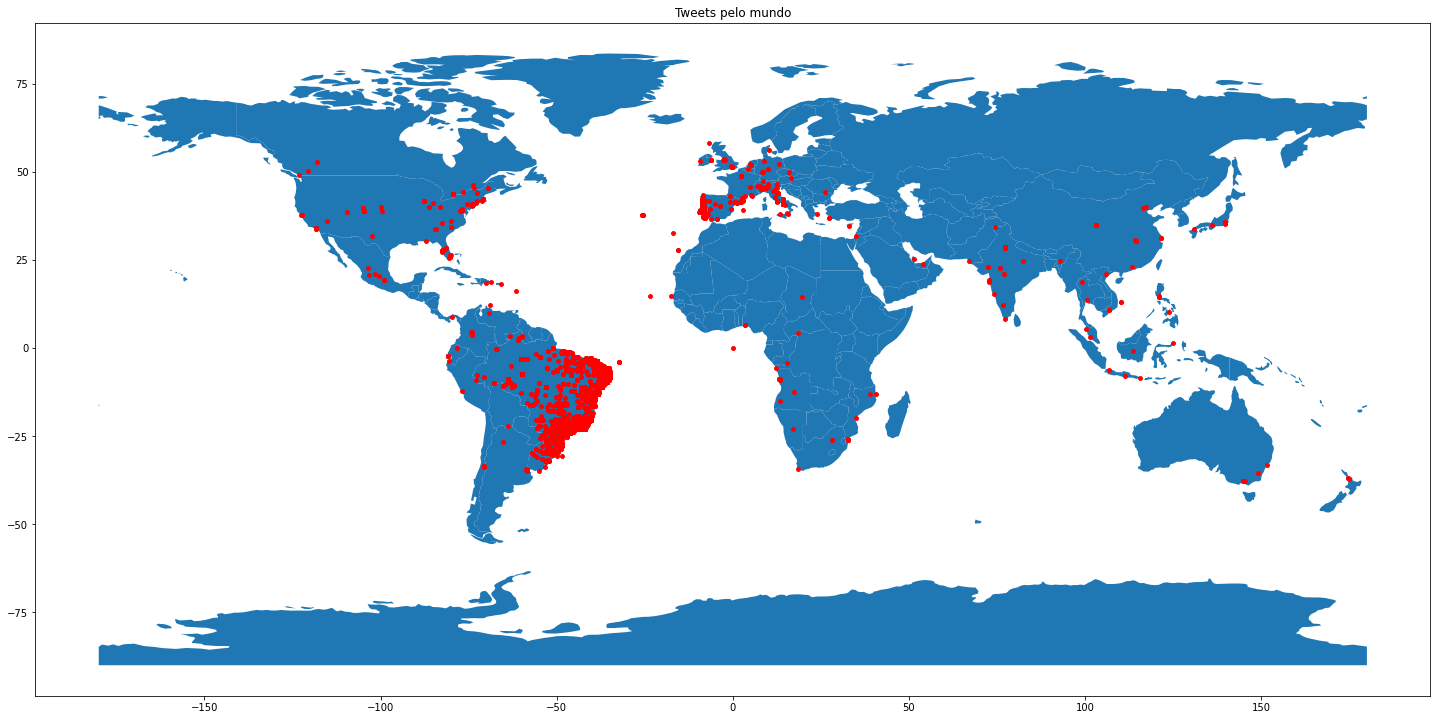

In [143]:
world_tweets_df = tweets_df.loc[tweets_df.latitude.notnull() & tweets_df.longitude.notnull()]
geometry = [Point(xy) for xy in zip(world_tweets_df.latitude, world_tweets_df.longitude)]
location_dic = {'tweet': world_tweets_df.texto, 'geometry': geometry}
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

tweets_gdf = gpd.GeoDataFrame(location_dic, geometry=geometry)
tweets_gdf.plot(ax=world.plot(figsize=(25, 20)), marker='o', color='red', markersize=15)
plt.title('Tweets pelo mundo')
plt.show()

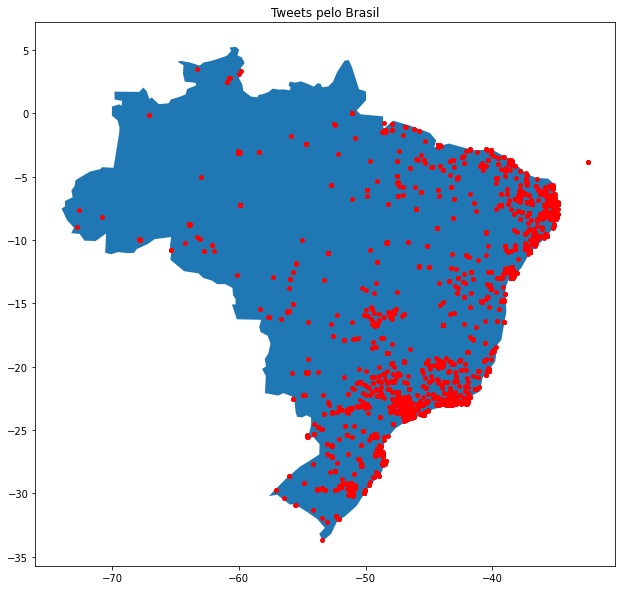

In [144]:
country = 'Brazil'
localized_tweets_df = tweets_df.loc[tweets_df.latitude.notnull() & tweets_df.longitude.notnull() & tweets_df.pais.eq(country)]
geometry = [Point(xy) for xy in zip(localized_tweets_df.latitude, localized_tweets_df.longitude)]
location_dic = {'tweet': localized_tweets_df.texto, 'geometry': geometry}
brazil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).loc[world.name == country]

tweets_gdf = gpd.GeoDataFrame(location_dic, geometry=geometry)
tweets_gdf.plot(ax=brazil.plot(figsize=(15, 10)), marker='o', color='red', markersize=15)
plt.title('Tweets pelo Brasil')
plt.show()

# Perguntas no Twitter

In [145]:
questions_df = tweets_df.loc[tweets_df.texto.str.contains('?', regex=False)]
new_rows = []

for row in questions_df.itertuples():
  sentences = nltk.sent_tokenize(row.texto)

  for sentence in sentences:
    if '?' in sentence and len(sentence) > 2:
      new_rows.append((row.data, row.usuario, row.apelido, sentence, row.retweet, row.seguidores, row.idioma, row.lugar, row.pais, row.sigla, row.latitude, row.longitude, row.hashtags))

questions_df = pd.DataFrame(new_rows, columns=tweets_df.columns.array)
questions_df

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado???,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus?,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o risco de termos piolhos super resistentes?,0,86,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
4,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do que a mídia corrupta está fazendo (tocando o terror na população)?",0,201,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198080,2020-05-25 22:53:13,O que houve com a couve?,couveluiza,Ansiedade?,0,1883,pt,NaN,NaN,NaN,NaN,NaN,[]
198081,2020-05-25 22:53:13,O que houve com a couve?,couveluiza,Angústia?,0,1883,pt,NaN,NaN,NaN,NaN,NaN,[]
198082,2020-05-25 22:53:13,O que houve com a couve?,couveluiza,Covid?,0,1883,pt,NaN,NaN,NaN,NaN,NaN,[]
198083,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerados\n\nunis*l: que tal uma aula no juri???,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]


In [146]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198085 entries, 0 to 198084
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   data        198085 non-null  datetime64[ns]
 1   usuario     198078 non-null  object        
 2   apelido     198085 non-null  object        
 3   texto       198085 non-null  object        
 4   retweet     198085 non-null  int64         
 5   seguidores  198085 non-null  int64         
 6   idioma      198085 non-null  object        
 7   lugar       8935 non-null    object        
 8   pais        8935 non-null    object        
 9   sigla       8935 non-null    object        
 10  latitude    661 non-null     float64       
 11  longitude   661 non-null     float64       
 12  hashtags    198085 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 19.6+ MB


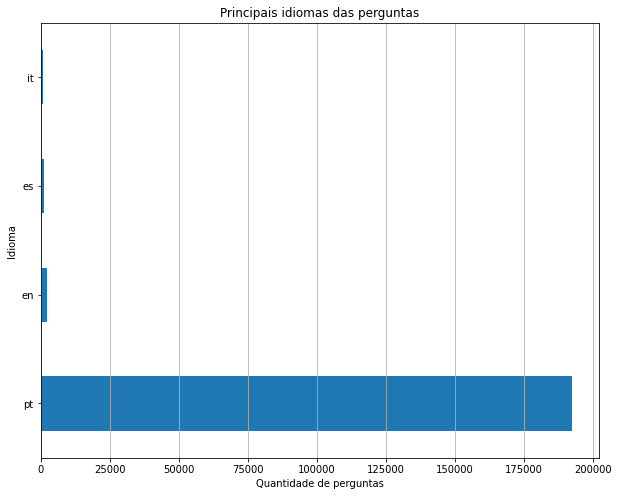

In [147]:
questions_df.groupby('idioma').idioma.count().sort_values(ascending = False)[:4].plot(kind='barh', figsize=(10, 8))
plt.title('Principais idiomas das perguntas')
plt.xlabel('Quantidade de perguntas')
plt.ylabel('Idioma')
plt.grid(axis='x')
plt.show()

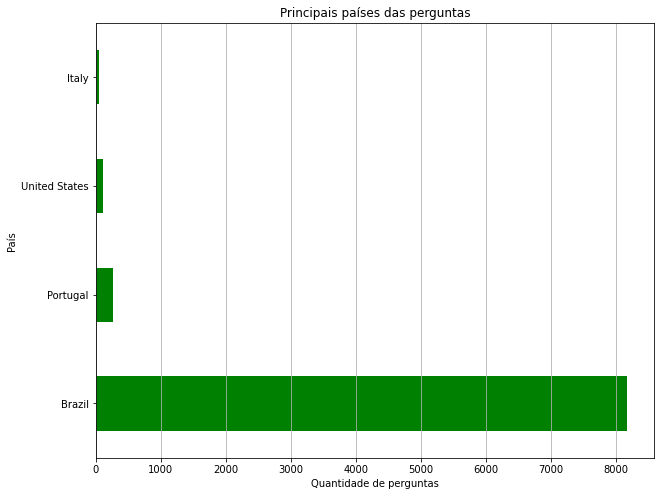

In [148]:
questions_df.groupby('pais').pais.count().sort_values(ascending = False)[:4].plot(kind='barh', figsize=(10, 8), color ='g')
plt.title('Principais países das perguntas')
plt.xlabel('Quantidade de perguntas')
plt.ylabel('País')
plt.grid(axis='x')
plt.show()

## Perguntas por mês
O gráfico abaixo mostra a quantidade de perguntas a partir de janeiro até junho.

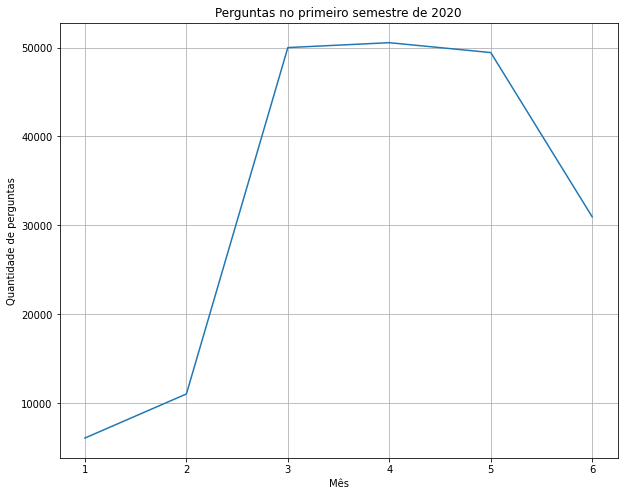

In [149]:
questions_df.groupby(questions_df.data.dt.month).texto.count().plot(figsize = (10, 8))
plt.title('Perguntas no primeiro semestre de 2020')
plt.xlabel('Mês')
plt.ylabel('Quantidade de perguntas')
plt.grid()
plt.show()

Houve aumento considerável no número de perguntas a partir do mês de fevereiro até o mês de março. A partir de então, o número de perguntas se manteu próximo a 50000 até o mês de maio, onde iniciou uma queda nas perguntas.

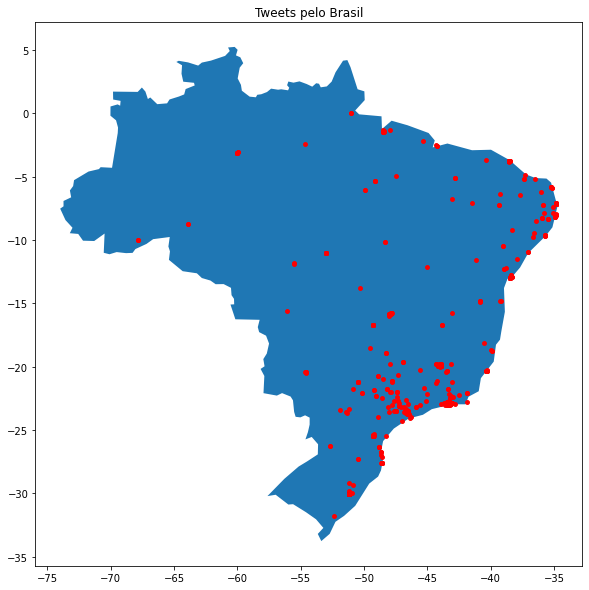

In [150]:
country = 'Brazil'
localized_tweets_df = questions_df.loc[questions_df.latitude.notnull() & questions_df.longitude.notnull() & questions_df.pais.eq(country)]
geometry = [Point(xy) for xy in zip(localized_tweets_df.latitude, localized_tweets_df.longitude)]
location_dic = {'tweet': localized_tweets_df.texto, 'geometry': geometry}
brazil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).loc[world.name == country]

tweets_gdf = gpd.GeoDataFrame(location_dic, geometry=geometry)
tweets_gdf.plot(ax=brazil.plot(figsize=(15, 10)), marker='o', color='red', markersize=15)
plt.title('Tweets pelo Brasil')
plt.show()

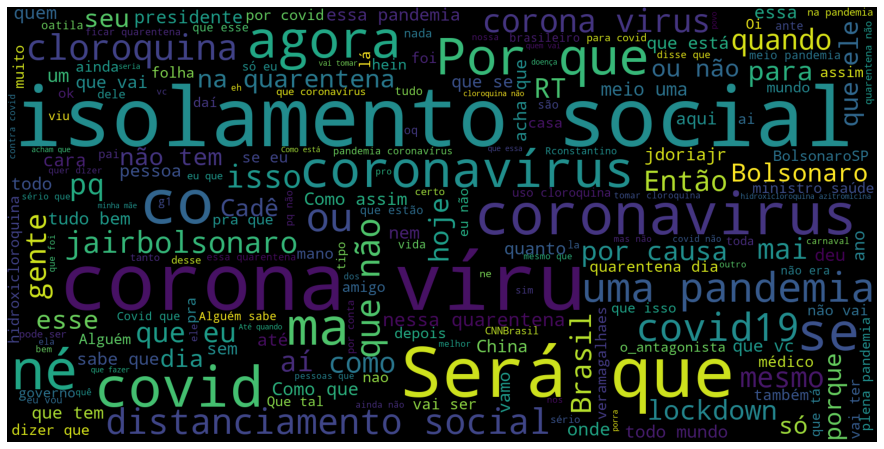

In [151]:
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","http","https"])
all_tweets = " ".join(s for s in questions_df.texto)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=1600, height=800).generate(all_tweets)

fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
plt.show()

# Temas Discutidos
## Doença

In [152]:
is_disease = questions_df.texto.str.contains('covid|corona|vírus|virus|doença|doenca|pandemia|gripe|pneumonia|sintoma', na=False, case=False)
disease_tweets_df = questions_df.loc[is_disease]
disease_tweets_df

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
1,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus?,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
5,2020-04-07 23:19:44,Mauricio Ligabo,LigaboMauricio,@JoseMedeirosMT Seria isso algum tipo aleatório de demência provocando pelo coronavírus?,0,23,pt,NaN,NaN,NaN,NaN,NaN,[]
6,2020-04-13 19:16:51,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de corona vírus""\n\nTa agora eu lhe pergunto cadê os vingadores?",3,253,pt,Santos,Brazil,BR,NaN,NaN,[]
9,2020-04-02 13:04:55,Luizcarlosdospatetas@hotmail.com,Luizcarlosdosp5,#perguntacorona \nQuero saber se a covid tem cura?,0,0,pt,NaN,NaN,NaN,NaN,NaN,['perguntacorona']
11,2020-04-02 13:56:41,Cândido Henrique,candidoh,"E essa chuvinha boa para pegar um resfriado e confundir com Covid-19, hem?",0,3254,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198072,2020-02-04 21:57:15,beatri💤️️,zaylenasouls,o que que é o corona vírus perto das beliebers?,4,23284,pt,NaN,NaN,NaN,NaN,NaN,[]
198075,2020-02-07 07:04:03,PT®️,ultratmr,@acruz39 Andas a fazer tratamentos ao Coronavirus?,0,977,pt,NaN,NaN,NaN,NaN,NaN,[]
198082,2020-05-25 22:53:13,O que houve com a couve?,couveluiza,Covid?,0,1883,pt,NaN,NaN,NaN,NaN,NaN,[]
198083,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerados\n\nunis*l: que tal uma aula no juri???,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]


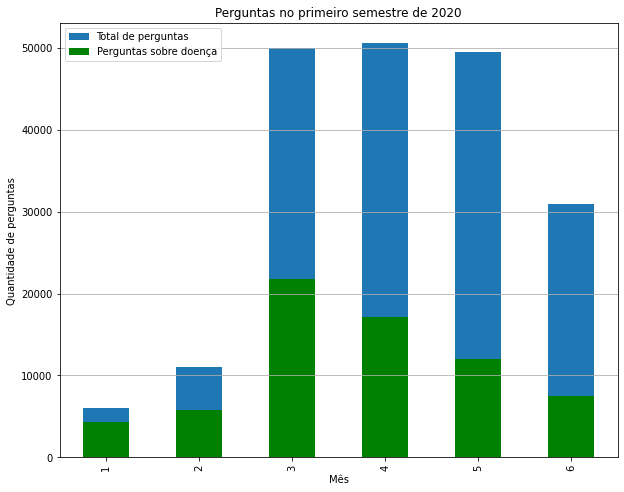

In [153]:
questions_df.groupby(questions_df.data.dt.month).texto.count().plot(kind='bar', figsize = (10, 8), label='Total de perguntas')
disease_tweets_df.groupby(disease_tweets_df.data.dt.month).texto.count().plot(kind="bar", figsize = (10, 8), color='g', label='Perguntas sobre doença')
plt.title('Perguntas no primeiro semestre de 2020')
plt.xlabel('Mês')
plt.ylabel('Quantidade de perguntas')
plt.legend()
plt.grid(axis='y')
plt.show()

In [154]:
import datetime
date_time_str = questions_df['data'][0]
#date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
#questions_df['data'] = questions_df['data'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
interval = (questions_df.data.dt.date == date_time_str.date() ) 
df_interval = questions_df.loc[interval]
print(df_interval)
print('Date:', date_time_str .date())
print('Time:', date_time_str .time())
print('Date-time:', date_time_str )

                      data  ... hashtags
0      2020-03-23 18:51:14  ...       []
18     2020-03-23 17:08:01  ...       []
19     2020-03-23 17:08:01  ...       []
69     2020-03-23 23:52:52  ...       []
70     2020-03-23 23:52:52  ...       []
...                    ...  ...      ...
197231 2020-03-23 18:59:22  ...       []
197459 2020-03-23 18:34:06  ...       []
197623 2020-03-23 15:52:58  ...       []
197922 2020-03-23 15:32:03  ...       []
197942 2020-03-23 18:31:07  ...       []

[2920 rows x 13 columns]
Date: 2020-03-23
Time: 18:51:14
Date-time: 2020-03-23 18:51:14


In [155]:
print(questions_df['data'][0].date())

2020-03-23


In [156]:
date = '2020-04-14'  #@param {type: "date"}
#@markdown ---
date_time_str = date
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')
interval = (questions_df.data.dt.date == date_time_obj.date() ) 
df_interval = questions_df.loc[interval]
print(df_interval)
df_interval.loc[df_interval.lugar.notnull()]


                      data  ...                                                     hashtags
134    2020-04-14 20:37:35  ...                                                           []
157    2020-04-14 21:17:25  ...                                                           []
165    2020-04-14 03:40:45  ...                                                           []
178    2020-04-14 01:27:28  ...                                                           []
179    2020-04-14 01:27:28  ...                                                           []
...                    ...  ...                                                          ...
197633 2020-04-14 22:00:15  ...  ['COVID19', 'coronavirus', 'TRAIDOR', 'WitzelVaiQuebrarRJ']
197675 2020-04-14 00:38:18  ...                                                           []
197676 2020-04-14 00:38:18  ...                                                           []
197784 2020-04-14 17:44:50  ...                                       

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
1798,2020-04-14 19:36:02,merina Rodrigues,MerinaRodrigues,@diogomainardi Não vale usar o remédio do Bolsonaro(Hidroxicloroquina).ok?,0,36,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[]
4978,2020-04-14 14:23:32,Jorginho,JorginPereira,MAS E O LULA COM A H1N1??,0,1507,pt,Barra Mansa,Brazil,BR,NaN,NaN,[]
5433,2020-04-14 09:26:45,Angela Spessotto,SpessottoA,@brasil247 Esses pacientes estão sendo medicados com cloroquina???,0,189,pt,Caraguatatuba,Brazil,BR,NaN,NaN,[]
7329,2020-04-14 03:32:14,Betinha Meireles,Beta_Meireles,O mundo parou a toa né?!,0,1406,pt,Sydney,Australia,AU,NaN,NaN,[]
9928,2020-04-14 21:19:27,ARAJ - 15/03 EU VOU,ARAJ60453594,Já tomou hidroxicloroquina?,0,202,pt,Jacareí,Brazil,BR,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193318,2020-04-14 15:34:13,galtiery rodrigues,GaltieryR,As mudanças da sociedade depois da pandemia: vocês acreditam mesmo nisso?,0,610,pt,Goiânia,Brazil,BR,NaN,NaN,[]
193319,2020-04-14 15:34:13,galtiery rodrigues,GaltieryR,Sabe no que eu acredito?,0,610,pt,Goiânia,Brazil,BR,NaN,NaN,[]
194169,2020-04-14 00:51:50,EDROZO,edsonro10112255,"Mas gostaria de saber como ele surgiu lá, através do que ?",0,32,pt,Poá,Brazil,BR,NaN,NaN,['drausiovarela']
195511,2020-04-14 19:57:45,Maylssonn,CantorMaylssonn,"Chefe, eu só quero saber uma coisa... Posso executar a missão?",0,222,pt,Salvador,Brazil,BR,-38.45589,-12.950291,['Maylssonn']


In [157]:


nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

lemmatizer = nltk.WordNetLemmatizer()
#word tokenizeing and part-of-speech tagger
document = 'Nova York é o novo epicentro da pandemia ?'
tokens = [nltk.word_tokenize(sent) for sent in [document]]
postag = [nltk.pos_tag(sent) for sent in tokens][0]

# Rule for NP chunk and VB Chunk
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        {<RB.?>*<VB.?>*<JJ>*<VB.?>+<VB>?} # Verbs and Verb Phrases
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
        
"""
#Chunking
cp = nltk.RegexpParser(grammar)

# the result is a tree
tree = cp.parse(postag)

def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() =='NP'):
        yield subtree.leaves()
        
def get_word_postag(word):
    if pos_tag([word])[0][1].startswith('J'):
        return wordnet.ADJ
    if pos_tag([word])[0][1].startswith('V'):
        return wordnet.VERB
    if pos_tag([word])[0][1].startswith('N'):
        return wordnet.NOUN
    else:
        return wordnet.NOUN
    
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    postag = get_word_postag(word)
    word = lemmatizer.lemmatize(word,postag)
    return word

def get_terms(tree):    
    for leaf in leaves(tree):
        terms = [normalise(w) for w,t in leaf]
        yield terms

terms = get_terms(tree)

features = []
for term in terms:
    _term = ''
    for word in term:
        _term += ' ' + word
    features.append(_term.strip())
features

LookupError: ignored

# Visão geral dos dados



1. Devem apresentar um resumo (sumário) com as estatísticas dos dados originais, ou seja, sem
qualquer pré-processamento. A apresentação deste tipo de informação relevante para que outras pessoas possam ter uma visão geral dos dados. As estatísticas podem ser apresentadas
através de tabelas e/ou gráficos.

Total de Registros | Total de Twitters | Total de Cidades | Total de HashTags 
--- | --- | --- | ---
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3 | Row 1, Col 4


---

Total de Registros Nulos | Total de  | Total de  | Total de  
--- | --- | --- | ---
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3 | Row 1, Col 4


---

Inserir Gráfico

2. As mensagens foram pré-processadas para que as perguntas (questões) fossem identificadas.
Essa coleção de perguntas corresponde ao dataset “DuvidasDB”. A seguir, a equipe deve
apresentar as estatísticas sobre esses dados.

Total de Perguntas Selecioandas | Total de  | Total de  
--- | --- | --- 
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3

Inserir Gráfico


In [ ]:
plt.plot([1,2,3],[5,7,4])
plt.show()

In [ ]:
x = [1,2,3]
y = [5,7,4]
x2 = [1,2,3]
y2 = [10,14,12]

plt.plot(x,y,label = 'linha 1')
plt.plot(x2,y2, label = 'linha 2')

plt.xlabel('eixo x')
plt.ylabel('eixo y')

plt.title('titulo do grafico')
plt.legend()

plt.show()

In [ ]:
plt.bar([1,3,5,7,9],[5,2,7,8,2],label=' categoria 1', color = 'b')
plt.plot()

In [ ]:
idades = [10,15,14,18,33,43,56,23,12]
div = [0,10,20,30,40,50,60]
plt.hist(idades, div,histtype='bar', rwidth=0.8)
plt.show()

In [ ]:
x = [1,2,3,4]
y = [12,12,4,29]

plt.scatter(x,y,label='gols', color='r', s=50, marker = "o")
plt.plot()

# Temas Discutidos

As equipes devem fazer uma análise sobre os temas que são debatidos nas perguntas dos
postadas pelos usuários. Faça uma análise se as perguntas são relativas aos seguintes temas:



1.   Doença. Quando a pergunta é relativa à doença. Deve-se observar que a doença é identificada por vários nomes. Exemplo: coronavírus, corona, COVID-19, etc.
2.   Medicamento. Quando a pergunta é sobre o uso de determinado medicamento no tratamento
da doença.
3.   Organizações. Quando a pergunta é relativa a uma determinada entidade ou organização.
Emissora de TV, Ministério da Saúde ou empresas, são exemplos de organizações.
4.   Pessoas. Quando a pergunta é sobre determinada pessoa. Por exemplo, a pergunta pode
ser sobre a atuação que determinado político ou pessoa famosa teve durante esse período de
pandemia.





# Visão Temporal

Deve-se fazer uma análise temporal das perguntas que formam o dataset DuvidasDB. Pode-se considerar o intervalo temporal de dias, semanas ou meses. A escolha do intervalo de tempo ficará a cargo das equipes. Exemplos de análise temporal: a) houve um aumento no número de perguntas ao longo do tempo? b) houve uma mudança no perfil das perguntas ao longo do tempo?

# Visão Geográfica

Deve-se fazer uma análise geográfica (espacial) das perguntas que formam o dataset DuvidasDB.
Existem algumas colunas no dataset que trazem a informação das localizações como, por exemplo,
o país, estado e cidade. Em alguns tuítes é possível ainda identificar as coordenadas geográficas de latitude e longitude. Exemplo de análise geográfica: a) os usuários de regiões diferentes fazem perguntas com diferentes focos? Por exemplo, será que os usuários de uma região perguntam mais sobre a doença ou sobre o tratamento? Essa análise ainda pode ser realizada em diversos níveis de
área (cidade, estado ou região). Além de apresentar a distribuição das dúvidas dos usuários por região, a equipe deverá fazer uma análise dessa distribuição. Por exemplo, apresentar as razões(ou hipóteses) da ocorrência dessa distribuição.